![image](https://user-images.githubusercontent.com/68840414/111744263-4956d500-88ce-11eb-9a4d-553ba1c0d7e6.png)

# 트랜스포머를 왜 병렬식이라고 하는가?



![image](https://user-images.githubusercontent.com/68840414/111744445-9aff5f80-88ce-11eb-87b2-c8dce2a9aed8.png)

rnn계열은 h를 계산하려면 h-1이 필요하고, h-1을 계산하려면 h-2를 계산해야합니다. 
그렇기에 rnn은 병렬구조입니다. 
하지만 transfomer는 그렇지 않고 h1부터 ht까지 한번에 계산을 합니다. 그렇기에 병렬구조라고 합니다. 
h-1부터 ht까지 계산할 때 계산할 때 멀티해드 어텐션을 쓰는거지 멀티해드라서 병렬이라는 것은 아닙니다. 
싱글헤드여도 어찌 되었든 h1부터 ht까지 한번에 계산을 하니깐 모든 time step에 대해서 한번에 계산을 할 수 있기 때문에 병렬구조라고 합니다!

## Super Resolution
![image](https://user-images.githubusercontent.com/68840414/111735908-28878300-88c0-11eb-8bbd-62ed66d35e4f.png)

해상도가 높다는 거는 픽셀의 수가 많다는 것이다. 픽셀수가 많으면 색을 표현하는 영역이 조밀하다. 

**super resolution** 기술이란?

저해상도 영상을 고해상도 영상으로 변환하는 작업과정을 말합니다. 초해상도라는 용어로도 사용됩니다.       
예) 하얀거탑 리마스터링제작, 화질이 나빠 식별이 불가능한 자동차 번호판 등등      

#### super resolution을 어렵게 만드는 요인들

![image](https://user-images.githubusercontent.com/68840414/111736250-d135e280-88c0-11eb-9028-95ba8aa8d622.png)


1) ill-posed(inverse) problem: 하나의 저해상도 이미지에 대해 여러 개의 고해상도 이미지가 나올 수 있습니다.       
다시말하면 저해상도 이미지를 고해상도 이미지로 변환하는데 다양한 경우의 수가 있습니다. 

2) 문제의 복잡도: 원래 가진 제한된 정보를 통해서 많은 정보를 만들어 내야하기에 과정이 복잡합니다. 그러므로 잘 못된 정보를 만들어 낼 가능성이 높다.

3) 시각적으로 해상도가 뛰어나더라도, 정량적인 평가 결과 육안과 다른 결과가 있을 수 있다. 


#### 모델학습과정 

고해상도 이미지를 준비하고, 특정한 처리과정을 거쳐 저해상도이미지를 생성하며, 생성된 저해상도 이미지를 입력으로 원래의 고해상도 이미지를 복원하도록 학습을 진행합니다. 

#### interpolation
가장 쉬운 super resolution




[[[143 120 104]
  [143 120 104]
  [141 118 102]
  ...
  [ 45  27  13]
  [ 45  27  13]
  [ 45  27  13]]

 [[146 123 107]
  [145 122 106]
  [143 120 104]
  ...
  [ 46  29  13]
  [ 45  29  13]
  [ 47  30  14]]

 [[148 126 112]
  [147 125 111]
  [146 122 109]
  ...
  [ 48  28  17]
  [ 49  29  18]
  [ 50  30  19]]

 ...

 [[ 92  58  30]
  [105  71  43]
  [132  98  71]
  ...
  [172 145 138]
  [172 145 138]
  [172 145 138]]

 [[128  92  60]
  [139 103  71]
  [134  95  64]
  ...
  [166 142 132]
  [166 142 132]
  [167 143 133]]

 [[139 103  71]
  [127  88  57]
  [125  86  53]
  ...
  [161 137 127]
  [161 137 127]
  [162 138 128]]]
(300, 451, 3)


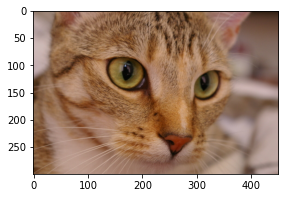

In [14]:
from skimage import data
import matplotlib.pyplot as plt

hr_image = data.chelsea() # skimage에서 제공하는 예제 이미지를 불러옵니다.
print(hr_image)
hr_shape = hr_image.shape[:2] #여기에서 :2를 가져온다는 게 어떤 의미일까요? 

print(hr_image.shape) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(6,3))
plt.imshow(hr_image)

(100, 150, 3)


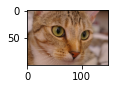

In [3]:
import cv2

#(300,451,3)사이즈의 dsize를 통해서 사이즈를 조절합니다.
#가로, 세로 픽셀수를 지정해줘야 크기를 조절할 수 있습니다. 

lr_image = cv2.resize(hr_image, dsize=(150,100)) # (가로 픽셀 수, 세로 픽셀 수)

print(lr_image.shape)

plt.figure(figsize=(3,1))
plt.imshow(lr_image)

#사이즈는 가로,세로로 입력은 하지만 이미지 크기는 세로, 가로로 출력됩니다. 

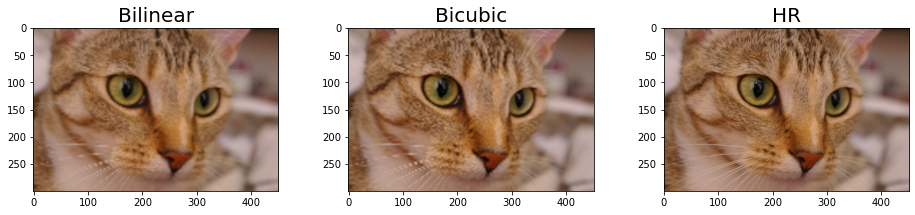

In [4]:
# interpolation을 설정해서 super resolution을 시도하겠습니다. 
#hr은 원본이미지입니다. 


bilinear_image = cv2.resize(
    lr_image, 
    dsize=(451, 300), # (가로 픽셀 수, 세로 픽셀 수) 
    interpolation=cv2.INTER_LINEAR # bilinear interpolation 적용
)

bicubic_image = cv2.resize(
    lr_image, 
    dsize=(451, 300), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

images = [bilinear_image, bicubic_image, hr_image]
titles = ["Bilinear", "Bicubic", "HR"]

plt.figure(figsize=(16,3)) #이미지 사이즈 조정 
#그림그리기 

for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.title(title, fontsize=20)

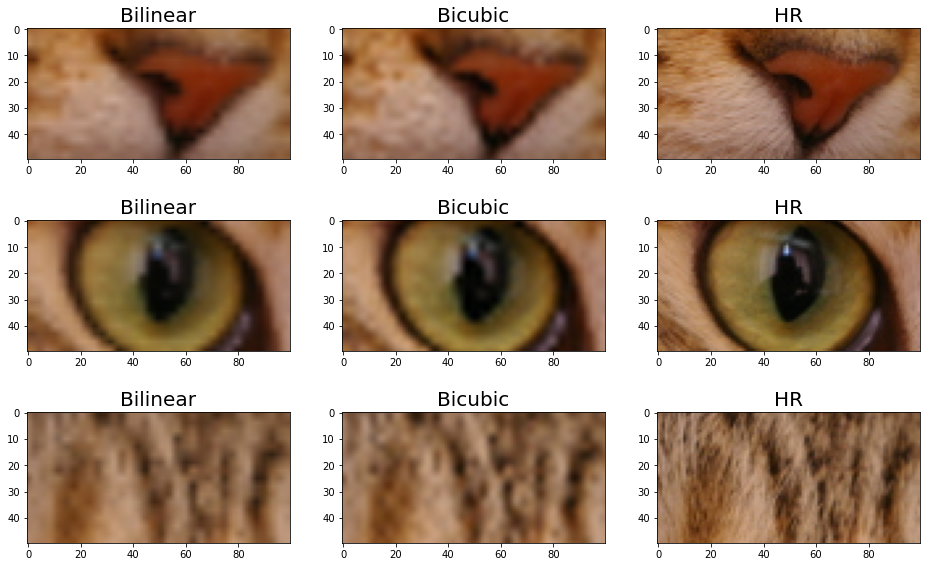

In [5]:
# 특정 영역을 잘라낼 함수를 정의합니다.

#interpolation방법은 이미지만 크게 만들어주고 세밀한 정보는 찾을 수가 없습니다. interpolation은 딥러닝방법에서 결과를 비교하기 위해 수행됩니다.

def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]


# 잘라낼 영역의 좌표를 정의합니다.
left_tops = [(220,200)] *3 + [(90,120)] *3 + [(30,200)] *3

plt.figure(figsize=(16,10))
for i, (image, left_top, title) in enumerate(zip(images*3, left_tops, titles*3)):
    plt.subplot(3,3,i+1)
    plt.imshow(crop(image, left_top))
    plt.title(title, fontsize=20)

# SRCNN

![image](https://user-images.githubusercontent.com/68840414/111741602-13afed00-88ca-11eb-92d3-863b38f19aaa.png)

1) 저해상도 이미지를 bicubic interpolation을 통해서 이미지를 늘립니다. 이게 srcnn의 input

2) 3개의 cnn을 통과하여 hr을 생성(고해상도)

3) 학습은 실제의 고해상도 이미지와 생성된 고해상도 이미지 사이의 차이를 역전파하여 신경망의 가중치를 학습합니다. 

4) mse를 사용하여 학습합니다. mean sequered error 


5) 연산은 3가지 

    * patch extraction and representation: 저해상도 이미지에서 patch를 추출합니다. (중요하다고 생각하는 특성값??)
    * non-linear mapping: patch를 다른 차원의 patch로 비선형 매핑
    * reconstruction: patch로부터 고해상도 이미지를 생성 

## SRCNN 이후 제안된 구조들 

![image](https://user-images.githubusercontent.com/68840414/111745665-45c44d80-88d0-11eb-968c-a17d49be36fa.png)

**vdsr(very deep super resolution)**

inperpolation을 통해 저해상도 이미지의 크기를 늘려 입력으로 사용합니다. 

* srcnn은 3개의 convolution layer를 사용했는데 **20개**를 사용합니다. 
* 최종의 초고해상도 이미지 생성직전에 처음 입력이미지를 더하는 residual connection을 사용합니다. 

**rcan**
![image](https://user-images.githubusercontent.com/68840414/111746268-22e66900-88d1-11eb-8338-c4a847dc43a8.png)
RCAN의 특징: conv layer의 결과인 특정맵을 대상으로 모든 정보가 균일한 중요도를 갖는 것이 아니라 일부 중요한 채널만 선택적으로 집중하도록 유도합니다. 
어떻게 이렇게 채널 어텐션을 하는지 너무 신기합니다!


### srcnn을 이용해 super resolution 도전하기 

* 데이터: DIV2K 
    * train:800, test:100
    * div2k/bicubic_x4는 고해상도 이미지를 bicubic interplolation을 이용해서 가로 및 세로 픽셀 수를 1/4로 줄인 데이터셋입니다. 
    * 저해상도 이미지와 고해상도 이미지가 서로 한 쌍입니다. 

### 데이터 준비하기 

EXTRACTING {'train_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip', 'valid_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X4.zip', 'train_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip', 'valid_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip'}


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/800 [00:00<?, ? examples/s]

Shuffling div2k-train.tfrecord...:   0%|          | 0/800 [00:00<?, ? examples/s]

Generating validation examples...:   0%|          | 0/100 [00:00<?, ? examples/s]

Shuffling div2k-validation.tfrecord...:   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset div2k downloaded and prepared to /home/ssac11/tensorflow_datasets/div2k/bicubic_x4/2.0.0. Subsequent calls will reuse this data.


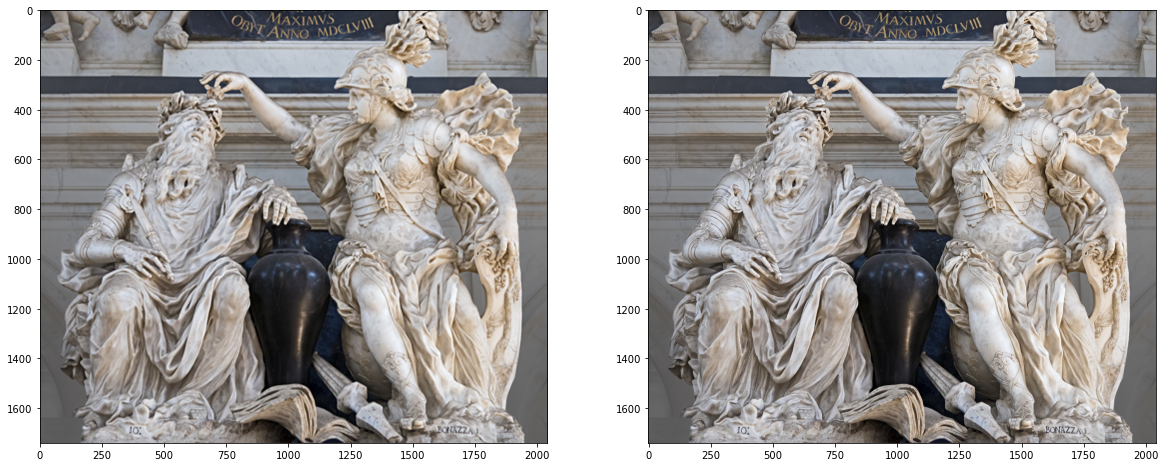

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# 데이터를 불러옵니다.
train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],as_supervised=True)

# 시각화를 위해 한 개의 데이터만 선택합니다.
for i, (lr, hr) in enumerate(valid): #valid set에 고해상도와 저해상도가 각각 1개씩 있는게 한 쌍이기 때문에 받아주는 변수를 저렇게 만들어놓음
    if i == 6: break 
    
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation 합니다.  
hr, lr = np.array(hr), np.array(lr)
bicubic_hr = cv2.resize(
    lr, 
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC) # bicubic 설정

# 저해상도 및 고해상도 이미지를 시각화합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_hr)
plt.subplot(1,2,2); plt.imshow(hr)

Text(0.5, 1.0, 'HR')

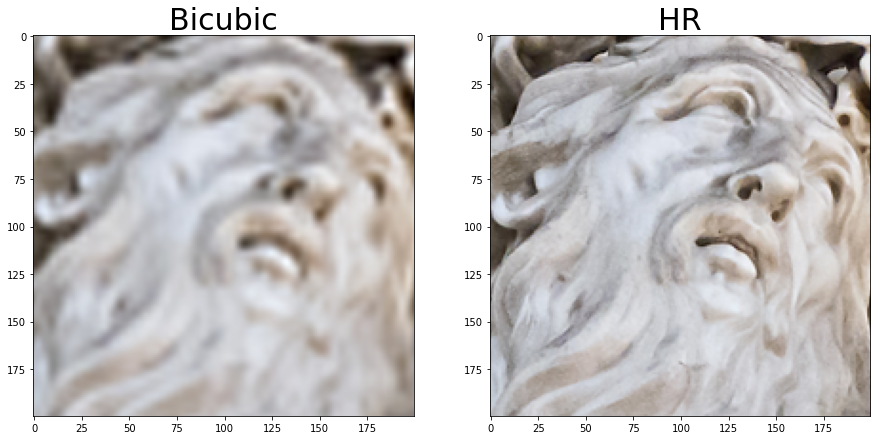

In [3]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (400, 500)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_hr = crop(hr, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,2,1); plt.imshow(crop_bicubic_hr); plt.title("Bicubic", fontsize=30)
plt.subplot(1,2,2); plt.imshow(crop_hr); plt.title("HR", fontsize=30)

In [ ]:
# srcnn은 고해상도 이미지에 맞게 크기를 조절하고 이미지가 크기때문에 일부 영역을 임으로 잘라내서 학습에 활용하겠습니다. 

In [4]:
import tensorflow as tf

def preprocessing(lr, hr):
    # 이미지의 크기가 크므로 (96,96,3) 크기로 임의 영역을 잘라내어 사용합니다.
    hr = tf.image.random_crop(hr, size=[96, 96, 3])
    hr = tf.cast(hr, tf.float32) / 255.
    
    # 잘라낸 고해상도 이미지의 가로, 세로 픽셀 수를 1/4배로 줄였다가
    # interpolation을 이용해 다시 원래 크기로 되돌립니다.
    # 이렇게 만든 저해상도 이미지를 입력으로 사용합니다.
    lr = tf.image.resize(hr, [96//4, 96//4], "bicubic")
    lr = tf.image.resize(lr, [96, 96], "bicubic")
    return lr, hr

train = train.map(preprocessing).shuffle(buffer_size=10).batch(16)
valid = valid.map(preprocessing).batch(16)
print("✅")

✅


In [6]:
# srcnn은 3개의 convlayer를 갖기 때문에 

from tensorflow.keras import layers, Sequential

# 3개의 convolutional layer를 갖는 Sequential 모델을 구성합니다.
srcnn = Sequential()
# 9x9 크기의 필터를 128개 사용합니다.
srcnn.add(layers.Conv2D(128, 9, padding="same", input_shape=(None, None, 3)))
srcnn.add(layers.ReLU())
# 5x5 크기의 필터를 64개 사용합니다.
srcnn.add(layers.Conv2D(64, 5, padding="same"))
srcnn.add(layers.ReLU())
# 5x5 크기의 필터를 64개 사용합니다.
srcnn.add(layers.Conv2D(3, 5, padding="same"))

srcnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 128)   31232     
_________________________________________________________________
re_lu_2 (ReLU)               (None, None, None, 128)   0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 64)    204864    
_________________________________________________________________
re_lu_3 (ReLU)               (None, None, None, 64)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 3)     4803      
Total params: 240,899
Trainable params: 240,899
Non-trainable params: 0
_________________________________________________________________


In [7]:
# srcnn학습하기 

srcnn.compile(
    optimizer="adam", 
    loss="mse"
)

srcnn.fit(train, validation_data=valid, epochs=1)

50/50 [==============================] - 18s 353ms/step - loss: 0.0228 - val_loss: 0.0073


In [9]:
#srcnn 테스트 하기 
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srcnn.h5'
srcnn = tf.keras.models.load_model(model_file)

In [10]:
def apply_srcnn(image):
    sr = srcnn.predict(image[np.newaxis, ...]/255.)
    sr[sr > 1] = 1
    sr[sr < 0] = 0
    sr *= 255.
    return np.array(sr[0].astype(np.uint8))

srcnn_hr = apply_srcnn(bicubic_hr)

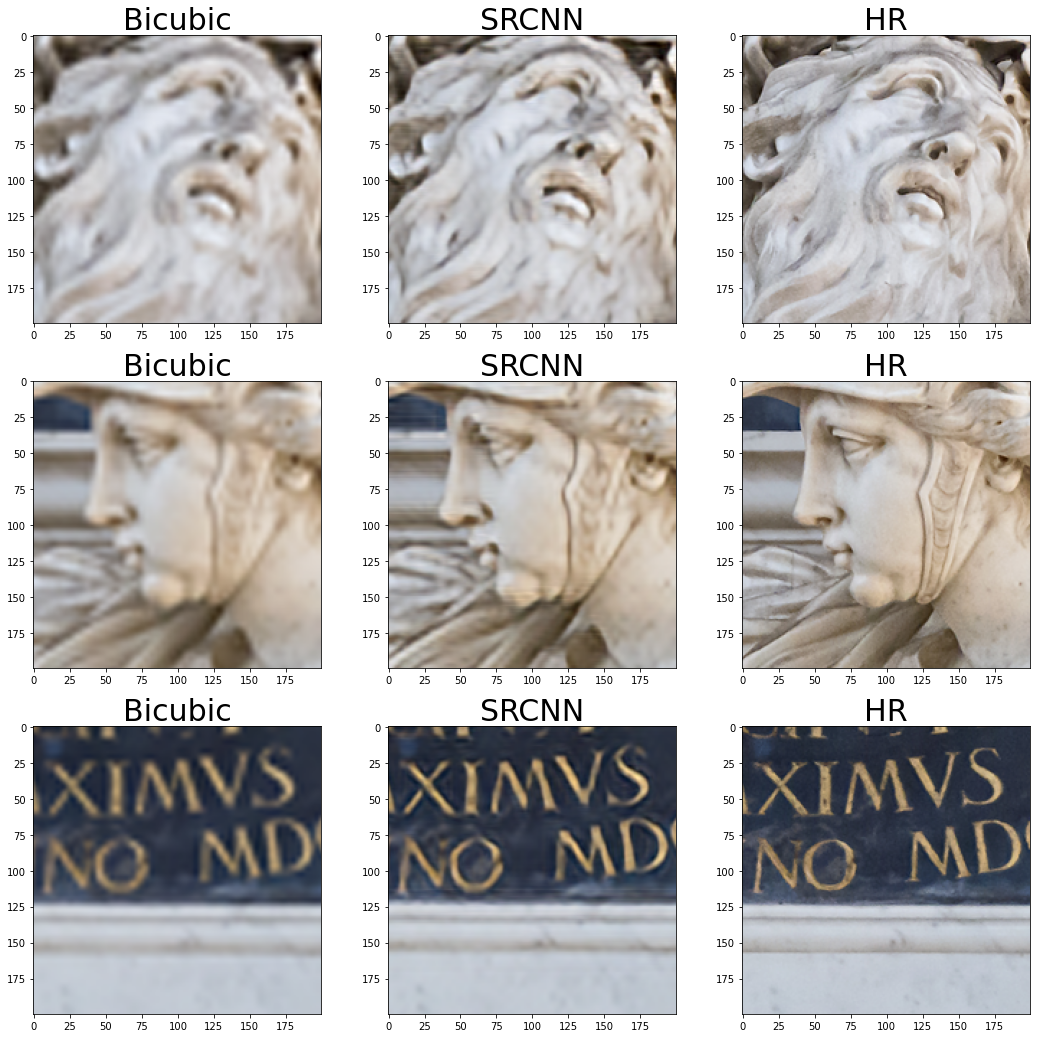

In [12]:
#일부영역만 확인해봅니다. 
#학습이 어떻게 된건지 이미지가 커서 일부영역만 크랩!

# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(400,500), (300,1200), (0,1000)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srcnn_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRCNN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

#  SRGAN
![image](https://user-images.githubusercontent.com/68840414/111759844-6517a680-88e1-11eb-967d-0c231b46365b.png)

* generator network와 discriminator network의 역할

    *generator network: 저해상도 이미지를 입력받아 가짜 고해상도 이미지를 만들어낸다.
    *discriminator network: 생성된 가짜 고해상도 이미지와 진짜 고해상도 이미지 중 진짜를 판별한다. 
    
## SRGAN의 LOSS

![image](https://user-images.githubusercontent.com/68840414/111760335-eec77400-88e1-11eb-9b53-fcbf41f7640e.png)

content loss가 특이하게 진짜 이미지와의 비교를 통한 loss가 아니라(srcnn)

생성된 고해상도 이미지와 실제 고해상도 이미지를 vgg에 입력하여 모델 중간에서 추출해낸 특징을 비교해서 loss를 계산합니다. 

이것과 gan을 통해 나온 loss를 합칩니다. 

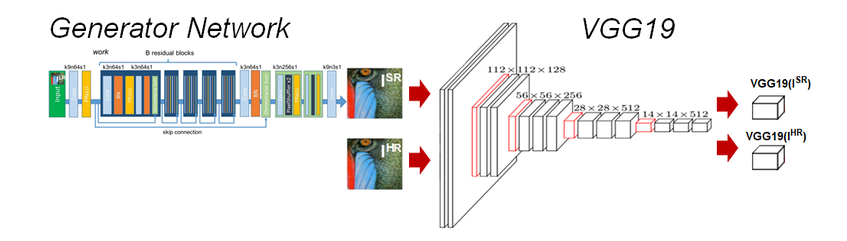

![image](https://user-images.githubusercontent.com/68840414/111761205-fb000100-88e2-11eb-8b28-7b1928e67e67.png)


srresnet은 srgan의 generator를 의미합니다. 

평가지표 2가지 

psnr과  ssim이 높을수록 원본영상과 가깝다는 것을 의미합니다. 

*psnr의 범위: inf 
*ssim의 범위: 0~1사이
